In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [3]:
mars_data = pd.read_html(url)


In [4]:
data = mars_data
data

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
mars_df = data[0]
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [6]:
mars_df["terrestrial_date"]=pd.to_datetime(mars_df["terrestrial_date"], format="%Y-%m-%d")
mars_df["id"]=mars_df["id"].astype("int")
mars_df["sol"]=mars_df["sol"].astype("int")
mars_df["ls"]=mars_df["ls"].astype("int")
mars_df["month"]=mars_df["month"].astype("int")
mars_df["min_temp"]=mars_df["min_temp"].astype("float")
mars_df["pressure"]=mars_df["pressure"].astype("float")

In [7]:
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [8]:
mars_months = mars_df["month"].unique()
mars_months

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

Text(0, 0.5, 'Unique Amount')

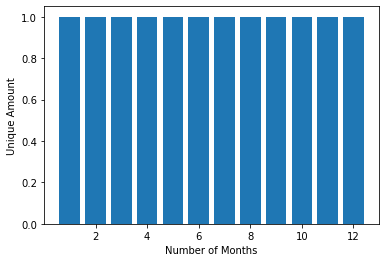

In [41]:
x_axis = mars_months
y_axis = [1]
plt.bar(x_axis, y_axis)
plt.xlabel("Number of Months")
plt.ylabel("Unique Amount")

In [20]:
mars_days = mars_df["sol"].count()
mars_days

1867

Text(0, 0.5, 'How Many Days')

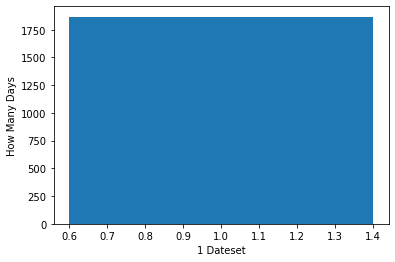

In [43]:
x_axis = [1]
y_axis = mars_days
plt.bar(x_axis, y_axis)
plt.xlabel("1 Dateset")
plt.ylabel("How Many Days")

In [10]:
group = mars_df.groupby(["month"])

avg_mars_temp = group["min_temp"].mean()  #groupby column month
avg_mars_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

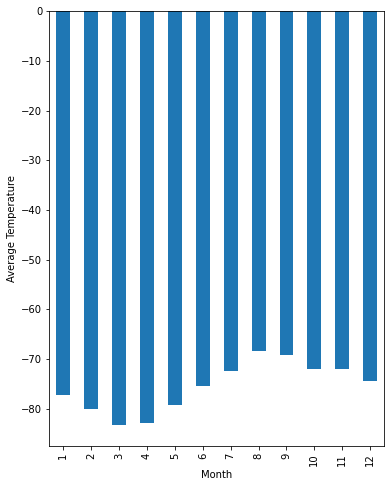

<Figure size 432x288 with 0 Axes>

In [32]:
pandas_min_temp = mars_df.groupby("month")
pt = pandas_min_temp["min_temp"].mean()

pandas_bar = pt.plot(kind="bar", figsize=(6,8))

pandas_bar.set_xlabel("Month")
pandas_bar.set_ylabel("Average Temperature")

plt.show()
plt.tight_layout()

In [12]:
group = mars_df.groupby(["month"])

avg_mars_pressure = group["pressure"].mean()   #groupby column month
avg_mars_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

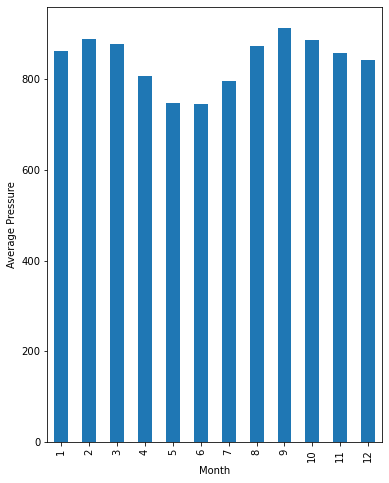

<Figure size 432x288 with 0 Axes>

In [33]:
pandas_pressure = mars_df.groupby("month")
pt = pandas_pressure["pressure"].mean()

pandas_bar = pt.plot(kind="bar", figsize=(6,8))

pandas_bar.set_xlabel("Month")
pandas_bar.set_ylabel("Average Pressure")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Temperature')

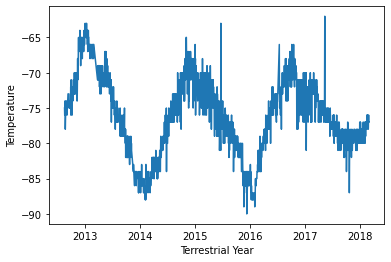

In [35]:
x_axis = mars_df["terrestrial_date"]
y_axis = mars_df["min_temp"]

plt.plot(x_axis, y_axis)
plt.xlabel("Terrestrial Year")
plt.ylabel("Temperature")

In [48]:
mars_df.to_csv("H:\\test1.csv", index=False)